# An example tuning the hyperparameters of SVM classifier is shown as usecase.

In [1]:
from mango.tuner import Tuner

In [2]:
from scipy.stats import uniform
from mango.domain.distribution import loguniform

param_dict = {"gamma": uniform(0.1, 4),
              "C": loguniform(-7, 8)}

# userObjective

In [3]:
from sklearn import svm, datasets
from sklearn.model_selection import cross_val_score

iris = datasets.load_iris()

# Take only the first two features.
X = iris.data[:,:2]
Y = iris.target

def objectiveSVM(args_list):
    global X,Y
    
    results = []
    for hyper_par in args_list:
        clf = svm.SVC(**hyper_par)
        result  = cross_val_score(clf, X, Y, scoring='accuracy').mean()
        results.append(result)
    return results

In [5]:
conf_Dict = dict()
conf_Dict['batch_size'] = 3
conf_Dict['num_iteration'] = 20

# Defining Tuner

In [6]:
tuner_user = Tuner(param_dict, objectiveSVM, conf_Dict)

In [7]:
tuner_user.getConf()

{'param_dict': {'gamma': <scipy.stats._distn_infrastructure.rv_frozen at 0x1a17a79160>,
  'C': <scipy.stats._distn_infrastructure.rv_frozen at 0x1a17a797f0>},
 'userObjective': <function __main__.objectiveSVM(args_list)>,
 'domain_size': 5000,
 'initial_random': 1,
 'num_iteration': 20,
 'objective': 'maximize',
 'batch_size': 3}

In [8]:
results = tuner_user.run()

# Inspect the results

In [9]:
print('best hyper parameters:',results['best_hyper_parameter'])
print('best objective:',results['best_objective'])

best hyper parameters: {'C': 0.06825324130250181, 'gamma': 1.5912221335789205}
best objective: 0.8337418300653594


In [10]:
print('Sample hyper parameters tried:',len(results['hyper_parameters_tried']))
print(results['hyper_parameters_tried'][:2])

Sample hyper parameters tried: 61
[{'C': 1.2760634399426538e-06, 'gamma': 0.7768126367826186}, {'C': 9.867991114408863, 'gamma': 3.654898484236999}]


In [11]:
print('Sample objective values',len(results['objective_values']))
print(results['objective_values'][:5])

Sample objective values 61
[0.8063725490196078, 0.7406045751633988, 0.7536764705882354, 0.7675653594771242, 0.806781045751634]


# Plotting the variation in objective values of the tried results

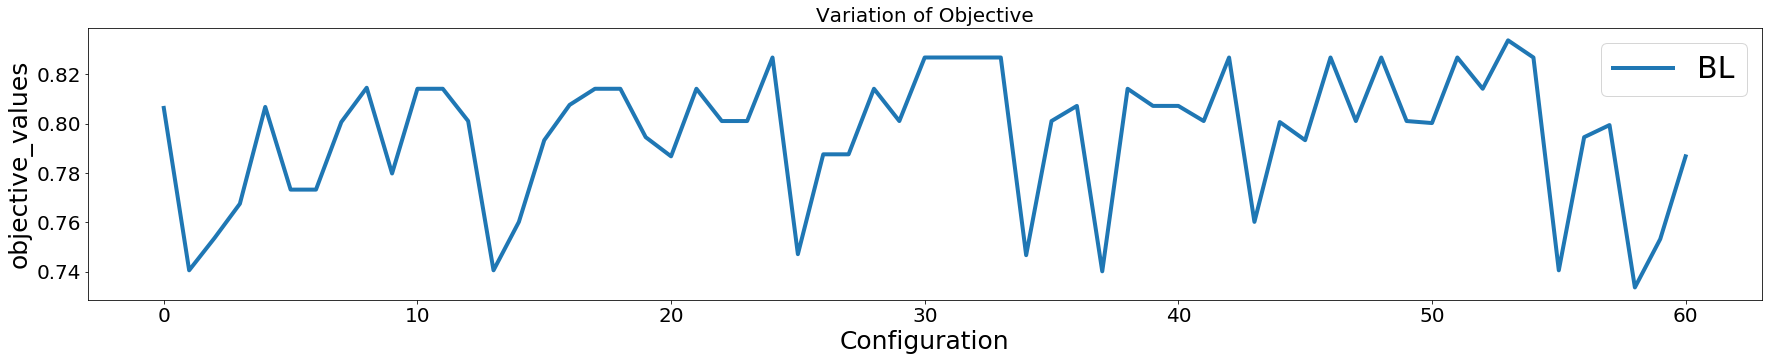

In [13]:
Size = 201 

from matplotlib import pyplot as plt
fig = plt.figure(figsize=(30,5))
plt.title('Variation of Objective',fontsize=20)
plt.plot(results['objective_values'][:Size],lw=4,label='BL')
plt.xlabel('Configuration', fontsize=25)
plt.ylabel('objective_values',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(prop={'size': 30})
plt.show()

# Plotting the variation of Max objective values of the tried results

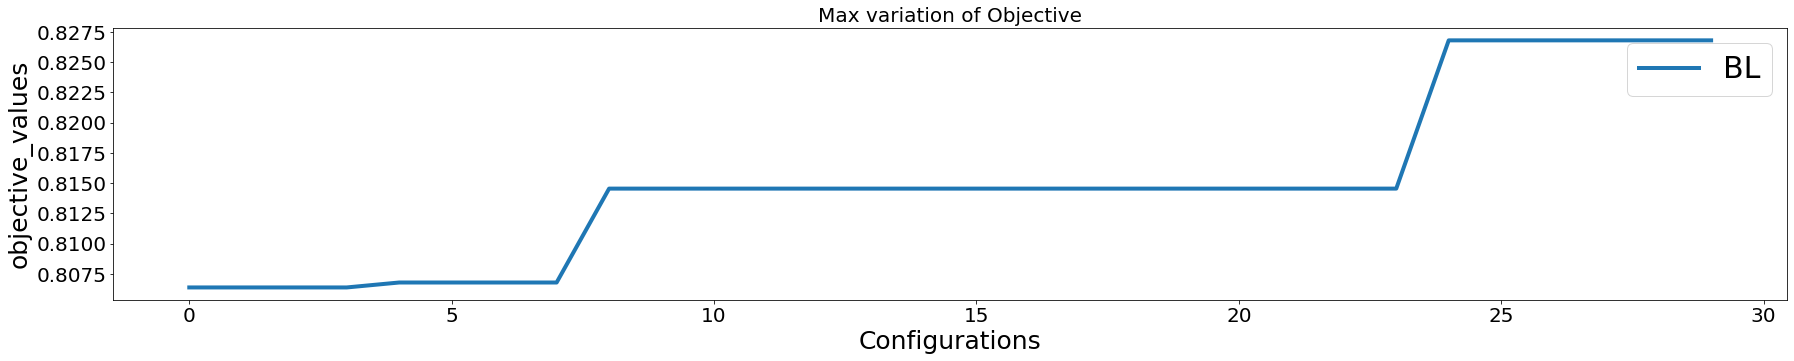

In [14]:
Size = 30 

import numpy as np

results_obj = np.array(results['objective_values'])

y_max=[]
for i in range(results_obj.shape[0]):
    y_max.append(np.max(results_obj[:i+1]))

from matplotlib import pyplot as plt
fig = plt.figure(figsize=(30,5))
plt.title('Max variation of Objective',fontsize=20)
plt.plot(y_max[:Size],lw=4,label='BL')
plt.xlabel('Configurations', fontsize=25)
plt.ylabel('objective_values',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(prop={'size': 30})
plt.show()

# See the Result

In [15]:
import pprint
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(results)

{   'best_hyper_parameter': {   'C': 0.06825324130250181,
                                'gamma': 1.5912221335789205},
    'best_objective': 0.8337418300653594,
    'hyper_parameters_tried': [   {   'C': 1.2760634399426538e-06,
                                      'gamma': 0.7768126367826186},
                                  {   'C': 9.867991114408863,
                                      'gamma': 3.654898484236999},
                                  {   'C': 4.696255508794526,
                                      'gamma': 3.2177292446913697},
                                  {   'C': 7.907027482606738,
                                      'gamma': 2.381573143443213},
                                  {   'C': 2.4772737961042117,
                                      'gamma': 0.10282861201466612},
                                  {   'C': 0.001000138614026084,
                                      'gamma': 0.10050618730513597},
                                  {   'C': 0.0010